In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#Número
np.random.rand()
#Lista
np.random.rand(10)
#Matriz
a = np.random.rand(1000,2)
print(a)

[[0.93154303 0.19266253]
 [0.43121906 0.76897803]
 [0.67578498 0.34230195]
 ...
 [0.36839411 0.14619461]
 [0.90435989 0.42570029]
 [0.45974251 0.79972553]]


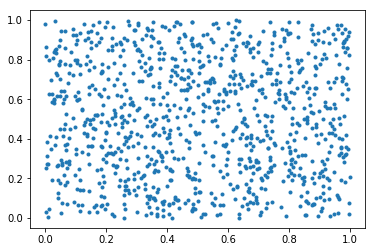

In [96]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(a[0:,0],a[0:,1],'.')


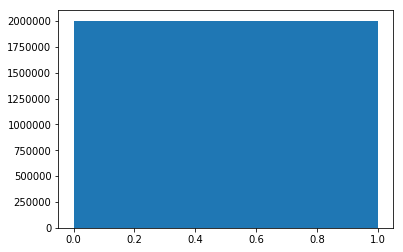

In [97]:
a= np.random.rand(100000000)
plt.hist(a,bins=50)
plt.show()

Se observa que la frecuencia de aparición de los números entre 0 y 1 es prácticamente la misma

In [98]:
#Se pueden generar números con distribuciones normales
x = []
y = []

for i in range(0,1000):
    if (i%2 == 0):
        x.append(np.random.normal())
    else:
        y.append(np.random.normal())

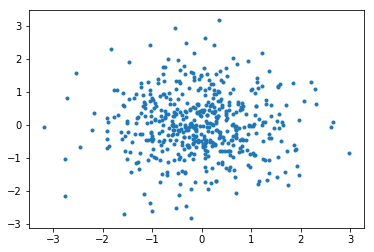

In [99]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(x,y,'.')
#Aplicaciones a Galaxias

In [100]:
t = np.random.normal(size = (100000))

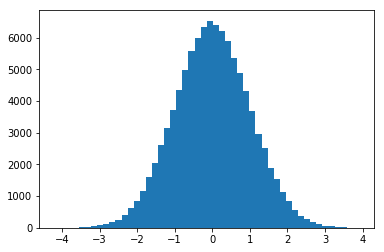

In [101]:
plt.hist(t,bins=50)
plt.show()

In [102]:
#Monte Carlo Integración
datos = np.random.rand(1000,2)

(0, 1)

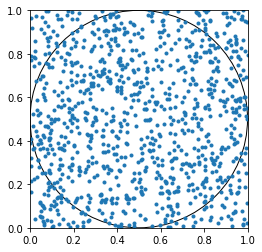

In [103]:
#Análisis de dispersión de números aleatorios
ax = plt.figure()
ax = plt.axes()
ax.plot(datos[0:,0],datos[0:,1],'.')
circle = plt.Circle((0.5,0.5),0.5,fill = False)
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [104]:
N_in = 0
N = datos.shape[0]

for i in range(0,int(datos.shape[0])):
    
    d  = ((datos[i][0]-0.5)**2-(datos[i][1]-0.5)**2)**0.5
    if d <= 0.5:
        N_in += 1
        
print(N_in)

510


/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [106]:
pi = 4*(N_in/N)
print("pi = %f"%pi)

pi = 2.040000


# Integración de Monte Carlo

In [119]:
#Dimensión
M = 10
#Puntos aleatorios
a = np.random.rand(1000000,M)          #Ojo!!!!!, estos valores deben estar entre los límites!!!!!!
print(a)
#Límites de integración
limites = np.array([[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])

[[0.71821035 0.25360332 0.63288122 ... 0.36655504 0.24200952 0.36109903]
 [0.14935108 0.46780616 0.89637785 ... 0.05801254 0.92239372 0.65013283]
 [0.4174513  0.51471837 0.37232226 ... 0.7218063  0.23331574 0.89483185]
 ...
 [0.84923443 0.39326948 0.68220733 ... 0.1600057  0.63452469 0.4107356 ]
 [0.11560335 0.20173585 0.13196115 ... 0.99841776 0.53123087 0.84453283]
 [0.89432435 0.14516445 0.80438809 ... 0.08030151 0.47692932 0.38930394]]


In [120]:
#Función a integrar
def f(r):
    sum = 0.0
    for i in range(len(r)):
        sum += r[i] 
    return (sum)**2

In [121]:
#Método de Monte Carlo
def Montecarlo(f,a,limites):
    prod = 1.0
    for i in range(0,limites.shape[0]):
        prod = prod*(limites[i][1]-limites[i][0])
    
    sum = 0.0
    for i in range(0,a.shape[0]):
        sum = sum + f(a[i])*prod
    
    return sum/a.shape[0]

In [122]:
#Solución exacta
print(155/6)

25.833333333333332


In [123]:
print(Montecarlo(f,a,limites))

25.822238184278063


In [128]:
#Error
def f2(r):
    sum = 0.0
    for i in range(len(r)):
        sum += r[i] 
    return ((sum)**2)**2


def error(f,f2,a,limites):
    V = 1.0
    
    for i in range(0,limites.shape[0]):
        V = V*(limites[i][1]-limites[i][0])
    
    sum1 = 0.0
    sum2 = 0.0
    
    for i in range(0,a.shape[0]):
        sum1 = sum1 + f(a[i])
        sum2 = sum2 + f2(a[i])
        
    value = V*(((sum2-sum1**2)/a.shape[0])**0.5)
    return value


In [129]:
print(error(f,f2,a,limites))

nan


/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
